In [336]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json

# Positions of RF Center 
The center of the quantum region is axial position = 0

In [315]:
filename = 'rf_center_phoenix.h5'
with h5py.File(filename, 'r') as fh:
    yz_index = np.array(fh['yz_index'])
    yz_um = np.array(fh['yz_um'])
    xs_um = np.array(fh['xs_um'])

Text(0, 0.5, 'Y position (um)')

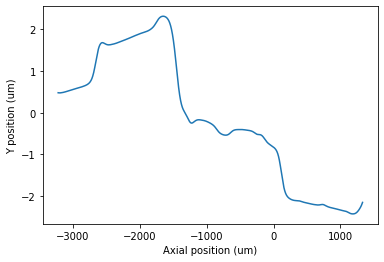

In [316]:
y_um = yz_um[0]
z_um = yz_um[1]
plt.plot(xs_um, y_um)
plt.xlabel('Axial position (um)')
plt.ylabel('Y position (um)')

Text(0, 0.5, 'Z position (um)')

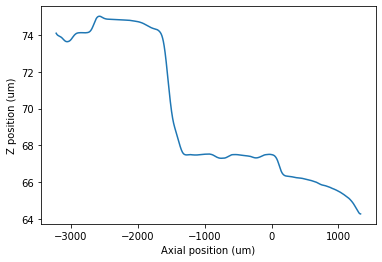

In [317]:
plt.plot(xs_um, z_um)
plt.xlabel('Axial position (um)')
plt.ylabel('Z position (um)')

# Write the solution file

In [7]:
# Open the desired solution file
filename = 'compensate_red_20230821/-35.h5'
with h5py.File(filename, 'r') as fh:
    electrode_names = json.loads(np.array(fh['electrode_names']).item())
    electrodes = np.array(fh['electrodes'])
    solutions = {k: np.array(v) for (k, v) in fh['solutions'].items()}

In [8]:
electrodes_used = []
for i in electrodes:
    temp = electrode_names[i]
    if len(temp[0]) == 2:
        temp = ['Q0'+temp[0][-1]]
    electrodes_used.append(temp)
electrodes_used

[['Q14'],
 ['Q15'],
 ['Q16'],
 ['Q17'],
 ['Q18'],
 ['Q19'],
 ['Q20'],
 ['Q21'],
 ['Q22'],
 ['Q23'],
 ['Q24'],
 ['Q25'],
 ['Q26'],
 ['Q27'],
 ['Q50'],
 ['Q51'],
 ['Q52'],
 ['Q53'],
 ['Q54'],
 ['Q55'],
 ['Q56'],
 ['Q57'],
 ['Q58'],
 ['Q59']]

In [9]:
solutions

{'dx': array([-0.00145003, -0.00145003, -0.00145003,  0.00096408,  0.00114496,
        -0.00135989, -0.00060728,  0.00057195,  0.00145003, -0.00108831,
        -0.00103086,  0.00145003,  0.00145003,  0.00145003, -0.00145003,
        -0.00145003, -0.00145003, -0.00145003, -0.0002691 ,  0.00030747,
         0.00145003,  0.00145003,  0.00145003,  0.00145003]),
 'dy': array([ 0.00073983, -0.0006158 ,  0.00073493, -0.00073983,  0.00073691,
        -0.00069972, -0.0001126 ,  0.00010216,  0.00073983, -0.00070435,
         0.00073983, -0.00073983,  0.00073983, -0.00054722,  0.00073983,
        -0.00073983,  0.00073983, -0.00073983,  0.00073983, -0.00073983,
         0.00073983, -0.00073983,  0.00073983, -0.00073903]),
 'dz': array([ 0.00193061,  0.00193061, -0.00170514,  0.00193061,  0.00114221,
        -0.00020981,  0.00010871,  0.00069116,  0.00114233, -0.00021273,
        -0.00168914,  0.00193061,  0.00193061,  0.00193061,  0.00193061,
         0.00193061,  0.00191815,  0.00193061,  0.00193

In [10]:
f = open("solutions/Phoenix_noQ16Q17.txt", "r")
names = list(f.readline().split("\t"))
values = list(f.readline().split("\t"))
f.close()

In [11]:
res_eg = {names[i]: values[i] for i in range(len(names))}
# Printing resultant dictionary
print("Example dictionary is : " + str(res_eg))

Example dictionary is : {'L0': '0', 'L1': '0', 'L2': '0', 'L3': '0', 'L4': '0', 'L5': '0', 'L6': '0', 'L7': '0', 'L8': '0', 'L9': '0', 'O0': '0', 'O1': '0', 'Q00': '0', 'Q01': '0', 'Q02': '0', 'Q03': '0', 'Q04': '0', 'Q05': '0', 'Q06': '0', 'Q07': '0', 'Q08': '0', 'Q09': '0', 'Q10': '0.07658143888397267', 'Q11': '0.8218001659049519', 'Q12': '0.8218027506098731', 'Q13': '0.8218027527392288', 'Q14': '0.19847500828067466', 'Q15': '-0.0791566626688488', 'Q16': '0', 'Q17': '0', 'Q18': '-0.07834568880533234', 'Q19': '0.2297778611837709', 'Q20': '0.8218027833953311', 'Q21': '0.8218027837262808', 'Q22': '0', 'Q23': '0', 'Q24': '0', 'Q25': '0', 'Q26': '0', 'Q27': '0', 'Q28': '0', 'Q29': '0', 'Q30': '0', 'Q31': '0', 'Q32': '0', 'Q33': '0', 'Q34': '0', 'Q35': '0', 'Q36': '0', 'Q37': '0', 'Q38': '0', 'Q39': '0', 'Q40': '0', 'Q41': '0', 'Q42': '0', 'Q43': '0', 'Q44': '0', 'Q45': '0', 'Q46': '0', 'Q47': '0', 'Q48': '-0.8218027691207956', 'Q49': '-0.8218027691029198', 'Q50': '-0.3838272533191884', 'Q

In [12]:
res = {names[i]: '0' for i in range(len(names))}
for i in range(len(electrodes_used)):
    res[electrodes_used[i][0]] = str(solutions['x2'][i]*0.3**2) # 0.3**2 means this solution will generate 0.3kHz axial frequency
# Printing resultant dictionary
print("Resultant dictionary is : " + str(res))

Resultant dictionary is : {'L0': '0', 'L1': '0', 'L2': '0', 'L3': '0', 'L4': '0', 'L5': '0', 'L6': '0', 'L7': '0', 'L8': '0', 'L9': '0', 'O0': '0', 'O1': '0', 'Q00': '0', 'Q01': '0', 'Q02': '0', 'Q03': '0', 'Q04': '0', 'Q05': '0', 'Q06': '0', 'Q07': '0', 'Q08': '0', 'Q09': '0', 'Q10': '0', 'Q11': '0', 'Q12': '0', 'Q13': '0', 'Q14': '0.4208549398035248', 'Q15': '0.4208549600977063', 'Q16': '0.4133487314835564', 'Q17': '0.4208493524514756', 'Q18': '-0.09228171882263098', 'Q19': '-0.03600931616319803', 'Q20': '-0.09799179326504656', 'Q21': '-0.12301654725266267', 'Q22': '-0.09240127309725583', 'Q23': '-0.03591382170836335', 'Q24': '0.4208551049947468', 'Q25': '0.42085510499963447', 'Q26': '0.4208550953953753', 'Q27': '0.42085509600946047', 'Q28': '0', 'Q29': '0', 'Q30': '0', 'Q31': '0', 'Q32': '0', 'Q33': '0', 'Q34': '0', 'Q35': '0', 'Q36': '0', 'Q37': '0', 'Q38': '0', 'Q39': '0', 'Q40': '0', 'Q41': '0', 'Q42': '0', 'Q43': '0', 'Q44': '0', 'Q45': '0', 'Q46': '0', 'Q47': '0', 'Q48': '0', '

In [13]:
# open file and write the content in a list
with open('solutions/Phoenix_2_m35.txt', 'w') as fp:
    fp.write('\t'.join(res.keys()))
    fp.write('\t'.join(res.values()))

# Write the global adjust file

In [67]:
f = open("solutions/global_adjust_with_trap_solution.txt", "r")
data = f.readlines()
f.close()

In [68]:
overwrite_dict = {'electrode_name': 79, 'dz': 80, 'dy':81, 'dx':82, 'yz':83, 'z2':84, 'x2':85}
scale = {'dz': 1000, 'dy':1000, 'dx':1000, 'yz':1, 'z2':1, 'x2':1}
names_adjust = list(data[overwrite_dict['electrode_name']].split("\t"))
def overwrite_coeff(data, item, idx, scale):
    res = {names_adjust[i]: '0' for i in range(len(names_adjust))}
    if item != 'electrode_name':
        for i in range(len(electrodes_used)):
            res[electrodes_used[i][0]] = str(solutions[item][i]*scale[item])
        data[idx] = '\t'.join(res.values())
        data[idx] = data[idx]+'\n'

In [69]:
for key in overwrite_dict.keys():
    overwrite_coeff(data, key, overwrite_dict[key], scale)

## Insert a new line

In [70]:
def generate_new_line(solutions, item, scale):
    res = {names_adjust[i]: '0' for i in range(len(names_adjust))}
    for i in range(len(electrodes_used)):
        res[electrodes_used[i][0]] = str(solutions[item][i]*scale)
    new_line = '\t'.join(res.values())
    new_line = new_line+'\n'
    return new_line

In [71]:
len(data)

152

In [72]:
x3_comp = generate_new_line(solutions, 'x3', scale = 0.001)

In [73]:
data[78]

'\n'

In [74]:
# del data[-1]

In [75]:
data.insert(78, 'x^3=72\n')

In [76]:
len(data)

153

In [77]:
data.insert(154, x3_comp)

### Insert another line

In [78]:
len(data)

154

In [79]:
x4_comp = generate_new_line(solutions, 'x4', scale = 0.001)

In [80]:
data[79]

'\n'

In [81]:
data.insert(79, 'x^4=73\n')

In [82]:
len(data)

155

In [83]:
data.insert(156, x4_comp)

In [84]:
with open('solutions/global_adjust_2_m35.txt', 'w') as fp:
    fp.writelines(data)

# Plot axial potential

In [85]:
from trap_dc import potentials
potential = potentials.Potential.import_64('/Users/sunke/Desktop/DukeLab/Code/DCsolution/trap_dc-master/scripts/RS1394_coarse.bin')

In [86]:
dir(potential)

['_Potential__init_alias',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data',
 'electrode_index',
 'electrode_names',
 'electrodes',
 'get_cache',
 'import_64',
 'import_v0',
 'import_v1',
 'nx',
 'ny',
 'nz',
 'origin',
 'stride',
 'x_axis_to_index',
 'x_index_to_axis',
 'y_axis_to_index',
 'y_index_to_axis',
 'z_axis_to_index',
 'z_index_to_axis']

In [87]:
potential.data.shape

(92, 4551, 9, 16)

In [88]:
data_quantum_region = []
for key in potential.electrode_index.keys():
    if key[0] == 'Q':
        data_quantum_region.append(potential.data[potential.electrode_index[key]])
data_quantum_region = np.array(data_quantum_region)
data_quantum_region.shape

(66, 4551, 9, 16)

### If the potential is loaded from an existing file

In [454]:
### Load trap potential 
f = open("solutions/Phoenix_2_m35.txt", "r")
names = list(f.readline().split("\t"))
values = list(f.readline().split("\t"))
f.close()

In [455]:
res_sol = {names[i]: values[i] for i in range(len(names))}
res_sol_quantum_region = {}
for key in res_sol.keys():
    if key[0] == 'Q':
        res_sol_quantum_region[key] = res_sol[key]
trap_solution = np.array([float(i) for i in res_sol_quantum_region.values()])
trap_solution[46:48] = 0
print('Trap solution is: ', trap_solution)

Trap solution is:  [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.42085494  0.42085496  0.41334873  0.42084935
 -0.09228172 -0.03600932 -0.09799179 -0.12301655 -0.09240127 -0.03591382
  0.4208551   0.4208551   0.4208551   0.4208551   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.4208532   0.39520241 -0.42085505 -0.42085506
 -0.4208551  -0.4208551  -0.4208551  -0.4208551   0.42085467  0.39856592
  0.          0.          0.          0.          0.          0.        ]


In [456]:
### Load compensation
f = open("solutions/global_adjust_2_m35.txt", "r")
data = f.readlines()
f.close()

In [475]:
comp_solution = 0.0
comp_values = {'dz': 0.0489, 'dy': -0.213, 'dx':0.008, 'yz':0.0, 'z2':0.00, 'x2':0.04, 'x3':0, 'x4':0}
comp_idx = {'dz': 82, 'dy':83, 'dx':84, 'yz':85, 'z2':86, 'x2':87, 'x3':154, 'x4':155}
for item in comp_values.keys():
    res = np.array([float(dt) for dt in data[comp_idx[item]].split('\t')])
    comp_solution += res * comp_values[item]
comp_solution

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.11227008,
        0.40101933, -0.06781187,  0.44674684, -0.13296217,  0.11189838,
       -0.01911045, -0.03806047, -0.13119001,  0.11495601, -0.06138233,
        0.45063699,  0.13547067,  0.40961193,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.11226932,  0.41603531, -0.26243272,  0.0533431 , -0.25237578,
        0.06740309, -0.23862276,  0.07654358,  0.13547048,  0.44056049,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [476]:
entire_solution = trap_solution + comp_solution
# entire_solution = trap_solution
entire_solution

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.53312502,
        0.82187429,  0.34553686,  0.86759619, -0.22524389,  0.07588907,
       -0.11710224, -0.16107702, -0.22359128,  0.07904219,  0.35947278,
        0.87149209,  0.55632576,  0.83046703,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.53312252,  0.81123772, -0.68328777, -0.36751196, -0.67323088,
       -0.35345201, -0.65947786, -0.34431151,  0.55632515,  0.83912641,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

### If the potential is from the new solution above

In [394]:
electrode_names_plot = ['Q'+f"{a:02}" for a in range(66)]
res = {electrode_names_plot[i]: 0.0 for i in range(len(electrode_names_plot))}
for i in range(len(electrodes_used)):
    res[electrodes_used[i][0]] = solutions['x2'][i]*0.3**2 # 0.3**2 means this solution will generate 0.3kHz axial frequency
# Printing resultant dictionary

trap_solution = np.array([float(i) for i in res.values()])
print('Trap solution is: ', trap_solution)

Trap solution is:  [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.42085494  0.42085496  0.41334873  0.42084935
 -0.09228172 -0.03600932 -0.09799179 -0.12301655 -0.09240127 -0.03591382
  0.4208551   0.4208551   0.4208551   0.4208551   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.4208532   0.39520241 -0.42085505 -0.42085506
 -0.4208551  -0.4208551  -0.4208551  -0.4208551   0.42085467  0.39856592
  0.          0.          0.          0.          0.          0.        ]


In [112]:
comp_values = {'dz': 0, 'dy': 0, 'dx':0, 'yz':0, 'z2':0, 'x2':0}
scale = {'dz': 1000, 'dy':1000, 'dx':1000, 'yz':1, 'z2':1, 'x2':0.0}
comp_solution = 0.0
for item in comp_values.keys():
    res = {electrode_names_plot[i]: 0 for i in range(len(electrode_names_plot))}
    for i in range(len(electrodes_used)):
        res[electrodes_used[i][0]] = solutions[item][i]*scale[item]*comp_values[item] 
    comp_solution += np.array([float(i) for i in res.values()])
comp_solution

NameError: name 'electrode_names_plot' is not defined

In [54]:
entire_solution = trap_solution + comp_solution
entire_solution

array([ 0.        ,  0.        ,  0.938557  , -0.07262443,  0.93856131,
        0.04817087,  0.9385618 , -0.12698919, -0.76333652,  0.64535384,
       -0.43263704,  0.22791026, -0.78825108,  0.66434481,  0.93856264,
       -0.08763639,  0.93856157,  0.03188098,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.72880215, -0.59239808,  0.09143914, -0.93856294,
        0.09143913, -0.93856296,  0.93856034, -0.68181942,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [57]:
entire_solution[0:10] = 0
entire_solution

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.43263704,  0.22791026, -0.78825108,  0.66434481,  0.93856264,
       -0.08763639,  0.93856157,  0.03188098,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.72880215, -0.59239808,  0.09143914, -0.93856294,
        0.09143913, -0.93856296,  0.93856034, -0.68181942,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

### Plot the potential

In [477]:
real_potential = 0
for i in range(len(entire_solution)):
    real_potential += entire_solution[i]*data_quantum_region[i]
real_potential.shape

(4551, 9, 16)

Text(0, 0.5, 'Potential (eV)')

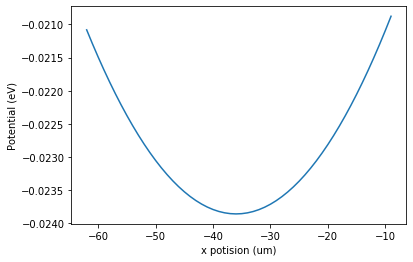

In [478]:
x_idx = np.arange(real_potential.shape[0])
plot_range = 27
sol_pos = 35
plot_center = 3045-(sol_pos-175)
plt.plot(potential.x_index_to_axis(x_idx)[(plot_center-plot_range):(plot_center+plot_range)]*1000, 
         real_potential[(plot_center-plot_range):(plot_center+plot_range), 4, 10])
plt.xlabel('x potision (um)')
plt.ylabel('Potential (eV)')

Text(0, 0.5, 'Potential (V/V)')

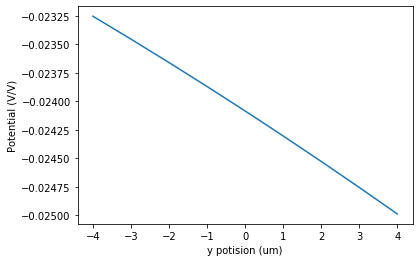

In [479]:
y_idx = np.arange(comp_potential.shape[1])
plt.plot(potential.y_index_to_axis(y_idx)*1000, real_potential[plot_center, :, 3])
plt.xlabel('y potision (um)')
plt.ylabel('Potential (V/V)')

Text(0, 0.5, 'Potential (V/V)')

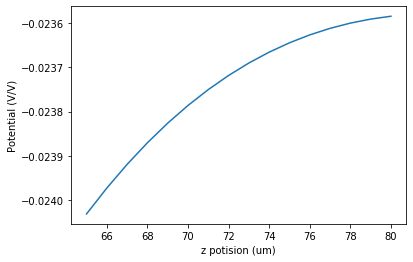

In [480]:
z_idx = np.arange(comp_potential.shape[2])
plt.plot(potential.z_index_to_axis(z_idx)*1000, real_potential[plot_center, 3, :])
plt.xlabel('z potision (um)')
plt.ylabel('Potential (V/V)')

## 2D colormap plot

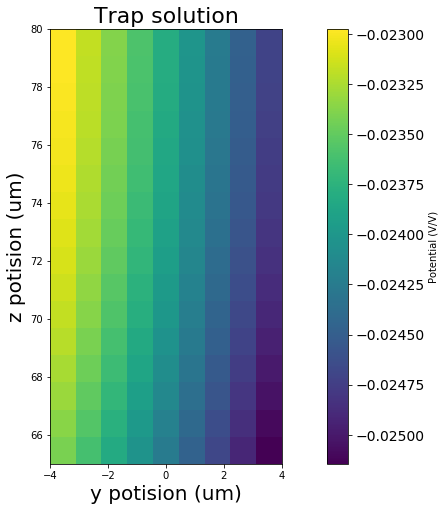

In [481]:
from mpl_toolkits.mplot3d import Axes3D  
x = potential.x_index_to_axis(x_idx)[(plot_center-plot_range):(plot_center+plot_range)]*1000
y = potential.y_index_to_axis(y_idx)*1000
z = potential.z_index_to_axis(z_idx)*1000

# Define the function for the colormap
p_yz = real_potential[plot_center, :, :].transpose()

fig = plt.figure(figsize = (16,8))
# Create a 2D colormap plot
plt.imshow(p_yz, extent=(y.min(), y.max(), z.min(), z.max()), origin='lower', cmap='viridis')

# Add colorbar
cbar = plt.colorbar(label='Potential (V/V)')
cbar.ax.tick_params(labelsize=14)

# Add labels to x and y axes
plt.xlabel('y potision (um)', fontsize=20)
plt.ylabel('z potision (um)', fontsize=20)

# Add title
plt.title('Trap solution', fontsize=22)

# Show the plot
plt.show()

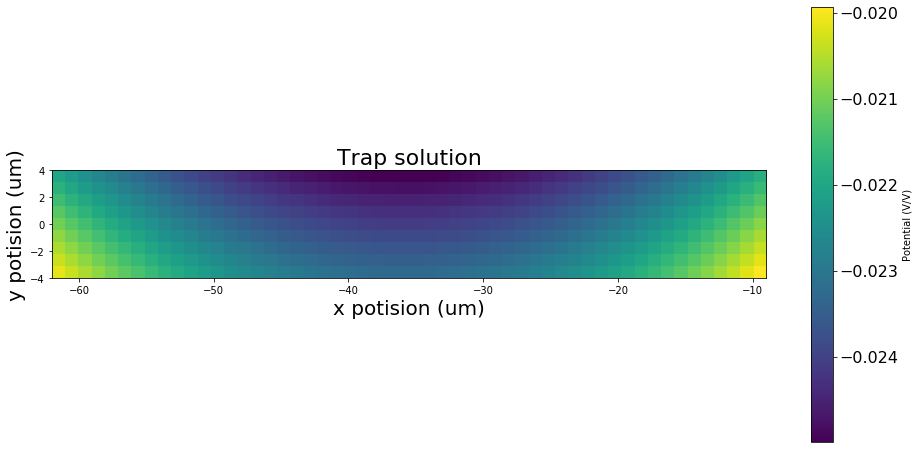

In [482]:
from mpl_toolkits.mplot3d import Axes3D  
x = potential.x_index_to_axis(x_idx)[(plot_center-plot_range):(plot_center+plot_range)]*1000
y = potential.y_index_to_axis(y_idx)*1000
z = potential.z_index_to_axis(z_idx)*1000

# Define the function for the colormap
p_xy = real_potential[(plot_center-plot_range):(plot_center+plot_range), :, 3].transpose()

fig = plt.figure(figsize = (16,8))
# Create a 2D colormap plot
plt.imshow(p_xy, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='viridis')

# Add colorbar
cbar = plt.colorbar(label='Potential (V/V)')
cbar.ax.tick_params(labelsize=16)

# Add labels to x and y axes
plt.xlabel('x potision (um)', fontsize=20)
plt.ylabel('y potision (um)', fontsize=20)

# Add title
plt.title('Trap solution', fontsize=22)

# Show the plot
plt.show()

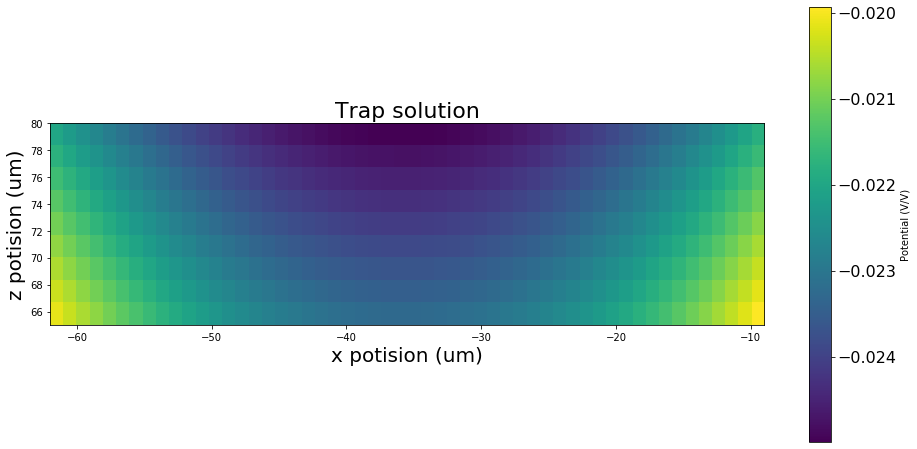

In [483]:
from mpl_toolkits.mplot3d import Axes3D  
x = potential.x_index_to_axis(x_idx)[(plot_center-plot_range):(plot_center+plot_range)]*1000
y = potential.y_index_to_axis(y_idx)*1000
z = potential.z_index_to_axis(z_idx)*1000

# Define the function for the colormap
p_xz = real_potential[(plot_center-plot_range):(plot_center+plot_range), 3, :].transpose()

fig = plt.figure(figsize = (16,8))
# Create a 2D colormap plot
plt.imshow(p_xy, extent=(x.min(), x.max(), z.min(), z.max()), origin='lower', cmap='viridis')

# Add colorbar
cbar = plt.colorbar(label='Potential (V/V)')
cbar.ax.tick_params(labelsize=16)

# Add labels to x and y axes
plt.xlabel('x potision (um)', fontsize=20)
plt.ylabel('z potision (um)', fontsize=20)

# Add title
plt.title('Trap solution', fontsize=22)

# Show the plot
plt.show()

In [218]:
e = 1.60217663e-19
kb = 1.380649e-23
n = 5
h = 6.62607015e-34
nu = 2e6
T_rt = 300
T_ion = n*h*nu/kb
print('Ion temperature is '+str(T_ion)+' K')
V_rt = kb*T_rt/e
V_ion = kb*T_ion/e
print('Room temp Potential (V) is:'+str(V_rt)+'V')
print('Ion temp Potential (V) is:'+str(V_ion)+'V')
V_set = 4e-6
T_set = e*V_set/kb
print('Set Potential barrier temperature is is:'+str(T_set)+'K')

Ion temperature is 0.0004799243073366221 K
Room temp Potential (V) is:0.02585199985097773V
Ion temp Potential (V) is:4.135667707248982e-08V
Set Potential barrier temperature is is:0.04641807237031279K


### Plot the compensation solutions

In [54]:
comp_solution_temp = 0.0

comp_idx = {'dz': 81, 'dy':82, 'dx':83, 'yz':84, 'z2':85, 'x2':86, 'x3':87}

comp_solution_temp = np.array([float(dt) for dt in data[comp_idx['x2']].split('\t')])
# comp_solution_temp = solutions['x3']/1000

comp_potential = 0
for i in range(len(comp_solution_temp)):
    comp_potential += comp_solution_temp[i]*data_quantum_region[i]
comp_potential.shape

(4551, 9, 16)

Text(0, 0.5, 'Potential (V/V)')

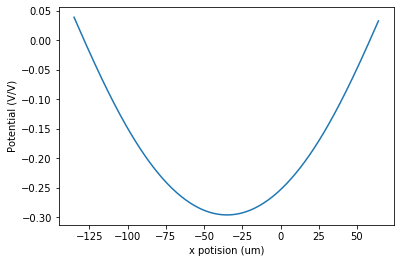

In [64]:
x_idx = np.arange(comp_potential.shape[0])
plot_range = 100
sol_pos = 35
plot_center = 3045-(sol_pos-175)
plt.plot(potential.x_index_to_axis(x_idx)[(plot_center-plot_range):(plot_center+plot_range)]*1000, 
         comp_potential[(plot_center-plot_range):(plot_center+plot_range), 3, 3]) 
# y_idx = 3: y = -1.00um, z_idx = 3: z = 68um, x_idx = 3045: x = -175um
plt.xlabel('x potision (um)')
plt.ylabel('Potential (V/V)')

Text(0, 0.5, 'Potential (V/V)')

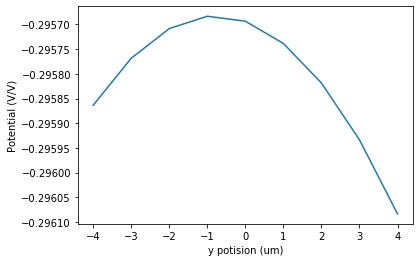

In [65]:
y_idx = np.arange(comp_potential.shape[1])
plt.plot(potential.y_index_to_axis(y_idx)*1000, comp_potential[plot_center, :, 3])
plt.xlabel('y potision (um)')
plt.ylabel('Potential (V/V)')

Text(0, 0.5, 'Potential (V/V)')

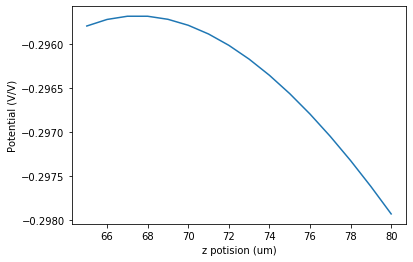

In [66]:
z_idx = np.arange(comp_potential.shape[2])
plt.plot(potential.z_index_to_axis(z_idx)*1000, comp_potential[plot_center, 3, :])
plt.xlabel('z potision (um)')
plt.ylabel('Potential (V/V)')